Want to look at what features top 100 albums have in common with each other. Valence, danceability, energy etc.... Could be interesting to see if this has changed over the decades

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
%matplotlib inline

client_id = ####
client_secret = #####

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager )

# 1980s

I couldn't find information on the top 100 albums in the UK in the 1980s, presumably this type of chart didn't exist back then to the degree it does now. I did, however, find a wikipedia page on the best selling albums in the 1980s. This list only includes 10 albums.

In [5]:
req = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_albums_of_the_1980s_in_the_United_Kingdom')
page = req.text
soup = BeautifulSoup(page, 'html.parser')
tables_wikitable = soup.find_all('table', 'wikitable')
rows = [row for row in tables_wikitable[0].find_all('tr')]

def get_cell(row):
    return [cell for cell in row.find_all('td')]

def get_uris(td_list):
    uri=[]
    for i in range(len(td_list)):
        if td_list[i][1].a != None: #Most values in the tables are hyperlinks
            query="album:"+td_list[i][0].a.text.lower()+" artist:"+td_list[i][1].a.text.lower()
        else: #If not a hyperlink, extract information this way
            query="album:"+td_list[i][0].a.text.lower()+" artist:"+td_list[i][1].text.strip("\n").lower()
        query_results=spotify.search(q=query , type='album')
        if len(query_results['albums']['items']) != 0:
            uri.append(query_results['albums']['items'][0]['uri'])
    return uri

In [6]:
cell_list = [get_cell(row)for row in rows[1:]]
uris_80=get_uris(cell_list)

In [7]:
def get_mean_feature(uri,feature:str):
    """Gets the mean value of certain audio features for a list of album uris.
    The feature parameter is what audio feature you want to view."""
                                
    feature_stat=np.zeros(len(uri))

    for n in range(len(uri)):
        track_results=spotify.album_tracks(uri[n])
        tracks=track_results['items']
        track_features=[spotify.audio_features(p['id'])[0][feature] for p in tracks]
        feature_stat[n]=np.mean(track_features)
    return feature_stat

In [9]:
valence_80=get_mean_feature(uris_80,"valence")
danceability_80=get_mean_feature(uris_80,"danceability")
energy_80=get_mean_feature(uris_80,"energy")

Text(0.5, 1.0, 'Distribution of valence values for the Top 10 albums of the 1980s')

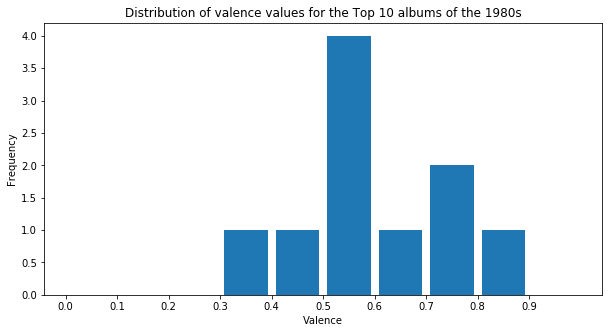

In [10]:
plt.figure(figsize=(10,5))
plt.hist(valence_80, bins=10,rwidth=0.85,range=(0,1),align="mid")
plt.xticks(np.arange(0,1,0.1))
plt.ylabel("Frequency")
plt.xlabel("Valence")
plt.title("Distribution of valence values for the Top 10 albums of the 1980s")

Text(0.5, 1.0, 'Distribution of danceability values for the Top 10 albums of the 1980s')

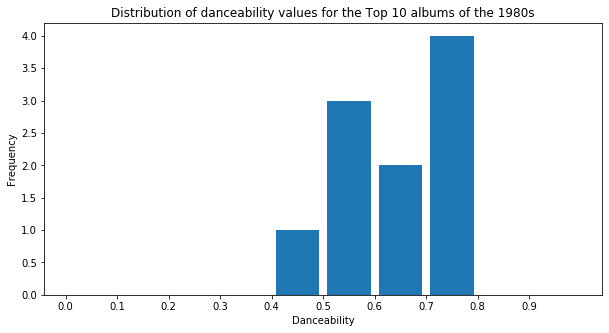

In [11]:
plt.figure(figsize=(10,5))
plt.hist(danceability_80,  bins=10,rwidth=0.85,range=(0,1),align="mid")
plt.xticks(np.arange(0,1,0.1))
plt.ylabel("Frequency")
plt.xlabel("Danceability")
plt.title("Distribution of danceability values for the Top 10 albums of the 1980s")

Text(0.5, 1.0, 'Distribution of energy values for the Top 10 albums of the 1980s')

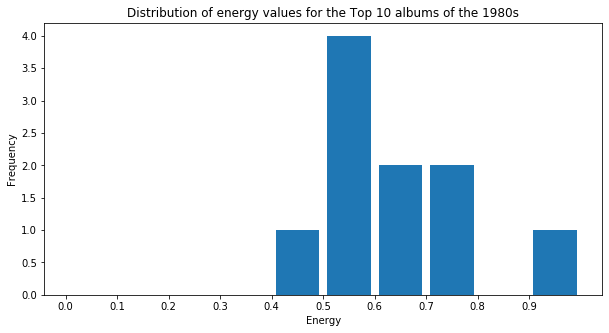

In [12]:
plt.figure(figsize=(10,5))
plt.hist(energy_80,  bins=10,rwidth=0.85,range=(0,1),align="mid")
plt.xticks(np.arange(0,1,0.1))
plt.ylabel("Frequency")
plt.xlabel("Energy")
plt.title("Distribution of energy values for the Top 10 albums of the 1980s")

In [13]:
print("Average valence:",np.mean(valence_80))
print("Average danceability:",np.mean(danceability_80))
print("Average energy:",np.mean(energy_80))

Average valence: 0.5862580871467469
Average danceability: 0.6378698550865567
Average energy: 0.6522011698455605


It's difficult to say anything of too much note about these results due to the sample size of only 10 albums. However, it is clear that an album is unlikely to get in the top 10 albums in the 1980s if it has very low valence, danceability or energy. The values for these attributes tend to vary between 0.4 and 0.9. Additionally, the most frequent values for energy and valence are between 0.5 and 0.6. This is slightly unexpected as I believed that, generally, happier and more positive albums would be most likely to be the best selling. Of course this is a big generalization and so may not hold up. Potentially it may also be unlikely that an album is consistenly happy throughout and will have sadder songs that bring the average valence down. My assumption may be more applicable to best selling singles, rather than albums. Next I will test other decades and compare them against each other. Later decades will have much bigger sample sizes

# 1990s

In [14]:
req_90 = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_albums_of_the_1990s_in_the_United_Kingdom')
page_90 = req_90.text
soup_90 = BeautifulSoup(page_90, 'html.parser')
tables_wikitable_90 = soup_90.find_all('table', 'wikitable')
rows_90 = [row for row in tables_wikitable_90[0].find_all('tr')]
cell_list_90 = [get_cell(row)for row in rows_90[1:]]

In [15]:
uris_90=get_uris(cell_list_90)

In [16]:
valence_90=get_mean_feature(uris_90,"valence")
danceability_90=get_mean_feature(uris_90,"danceability")
energy_90=get_mean_feature(uris_90,"energy")

Text(0.5, 1.0, 'Distribution of valence values for the Top 10 albums of the 1990s')

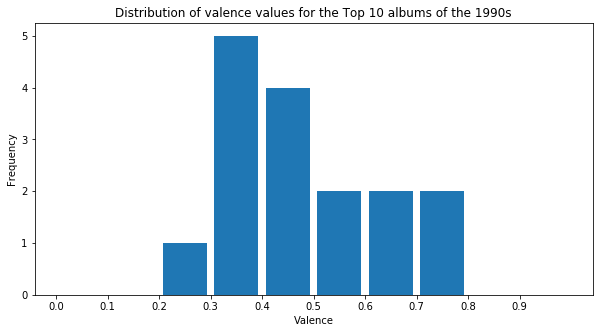

In [17]:
plt.figure(figsize=(10,5))
plt.hist(valence_90, bins=10,rwidth=0.85,range=(0,1),align="mid")
plt.xticks(np.arange(0,1,0.1))
plt.ylabel("Frequency")
plt.xlabel("Valence")
plt.title("Distribution of valence values for the Top 10 albums of the 1990s")

In [18]:
print("Average valence:",np.mean(valence_90))
print("Average danceability:",np.mean(danceability_90))
print("Average energy:",np.mean(energy_90))

Average valence: 0.4696807339543908
Average danceability: 0.555998755465266
Average energy: 0.6343956434155453


# 2000s

In [19]:
req_00 = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_albums_of_the_2000s_(decade)_in_the_United_Kingdom')
page_00 = req_00.text
soup_00 = BeautifulSoup(page_00, 'html.parser')
tables_wikitable_00 = soup_00.find_all('table', 'wikitable')
rows_00 = [row for row in tables_wikitable_00[0].find_all('tr')]
cell_list_00 = [get_cell(row)for row in rows_00[1:]]


In [20]:
uris_00=get_uris(cell_list_00)

In [24]:
#valence_00=get_mean_feature(uris_00,"valence")
#danceability_00=get_mean_feature(uris_00,"danceability")
energy_00=get_mean_feature(uris_00,"energy")

Text(0.5, 1.0, 'Distribution of valence values for the Top 10 albums of the 2000s')

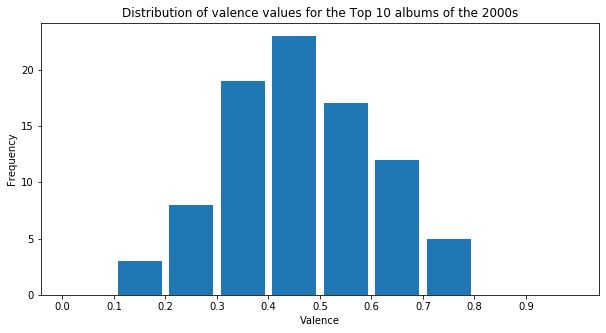

In [22]:
plt.figure(figsize=(10,5))
plt.hist(valence_00, bins=10,rwidth=0.85,range=(0,1),align="mid")
plt.xticks(np.arange(0,1,0.1))
plt.ylabel("Frequency")
plt.xlabel("Valence")
plt.title("Distribution of valence values for the Top 10 albums of the 2000s")

In [25]:
print("Average valence:",np.mean(valence_00))
print("Average danceability:",np.mean(danceability_00))
print("Average energy:",np.mean(energy_00))

Average valence: 0.4622029226742266
Average danceability: 0.5505935304108894
Average energy: 0.6445434201052064


# 2010s

In [26]:
req_10 = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_albums_of_the_2010s_in_the_United_Kingdom')
page_10 = req_10.text
soup_10 = BeautifulSoup(page_10, 'html.parser')
tables_wikitable_10 = soup_10.find_all('table', 'wikitable')
rows_10 = [row for row in tables_wikitable_10[0].find_all('tr')]
cell_list_10 = [get_cell(row)for row in rows_10[1:]]


In [27]:
uris_10=get_uris(cell_list_10)

In [30]:
#valence_10=get_mean_feature(uris_10,"valence")
#danceability_10=get_mean_feature(uris_10,"danceability")
energy_10=get_mean_feature(uris_10,"energy")

Text(0.5, 1.0, 'Distribution of valence values for the best selling albums of the 2010s')

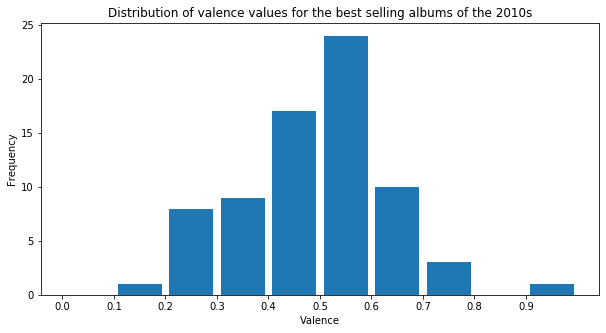

In [34]:
plt.figure(figsize=(10,5))
plt.hist(valence_10, bins=10,rwidth=0.85,range=(0,1),align="mid")
plt.xticks(np.arange(0,1,0.1))
plt.ylabel("Frequency")
plt.xlabel("Valence")
plt.title("Distribution of valence values for the best selling albums of the 2010s")

In [33]:
print("Average valence:",np.mean(valence_00))
print("Average danceability:",np.mean(danceability_00))
print("Average energy:",np.mean(energy_00))

Average valence: 0.4622029226742266
Average danceability: 0.5505935304108894
Average energy: 0.6445434201052064


From the results it seems that the valence of albums becomes more spread over time, with more extremes such as albums with average valences of 0.1 to 0.2 or 0.9 to 1.0. However, this could easily be a symptom of having more albums in the dataset for later decades and if we had a similar sample size for the 1980s it could show similar distributions. What is a common trait between the distributions of all decades is that the most frequent valence values are in the middle of the possible valence values, rather than at the extremes. A potential conclusion that could be made from the histograms is that, since the 90s, the best selling albums have been generally getting happier. With the most common valence value being between 0.3-0.4 in the 90s, 0.4-0.5 in the 00s and 0.5-0.6 in the 10s. 

# Further Analysis and Visualization

Text(0.5, 0, 'Decade')

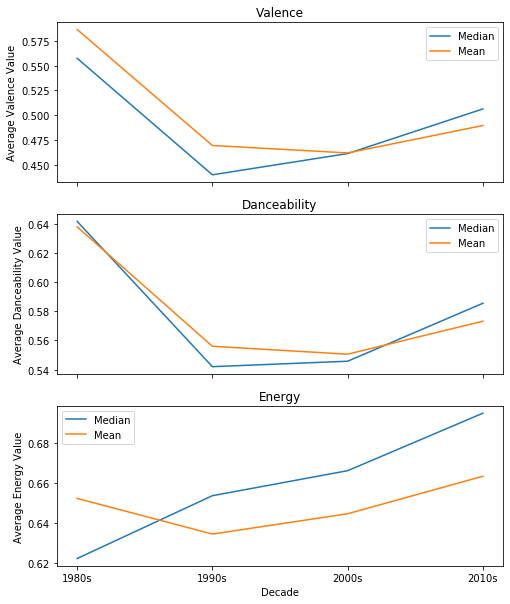

In [70]:
decade=["1980s","1990s","2000s","2010s"]
valence_median=[np.median(valence_80),np.median(valence_90),np.median(valence_00),np.median(valence_10)]
valence_mean=[np.mean(valence_80),np.mean(valence_90),np.mean(valence_00),np.mean(valence_10)]
danceability_median=[np.median(danceability_80),np.median(danceability_90),np.median(danceability_00),np.median(danceability_10)]
danceability_mean=[np.mean(danceability_80),np.mean(danceability_90),np.mean(danceability_00),np.mean(danceability_10)]
energy_median=[np.median(energy_80),np.median(energy_90),np.median(energy_00),np.median(energy_10)]
energy_mean=[np.mean(energy_80),np.mean(energy_90),np.mean(energy_00),np.mean(energy_10)]


fig, axs = plt.subplots(3, sharex=True,figsize=(8,10))
axs[0].plot(decade,valence_median)
axs[0].plot(decade,valence_mean)
axs[0].set(ylabel="Average Valence Value",title="Valence")
axs[0].legend(["Median","Mean"])
axs[1].plot(decade,danceability_median)
axs[1].plot(decade,danceability_mean)
axs[1].set(ylabel="Average Danceability Value",title="Danceability")
axs[1].legend(["Median","Mean"])
axs[2].plot(decade,energy_median)
axs[2].plot(decade,energy_mean)
axs[2].set(ylabel="Average Energy Value",title="Energy")
axs[2].legend(["Median","Mean"])
plt.xlabel("Decade")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Valence'), Text(0.5, 1.0, '10s')]

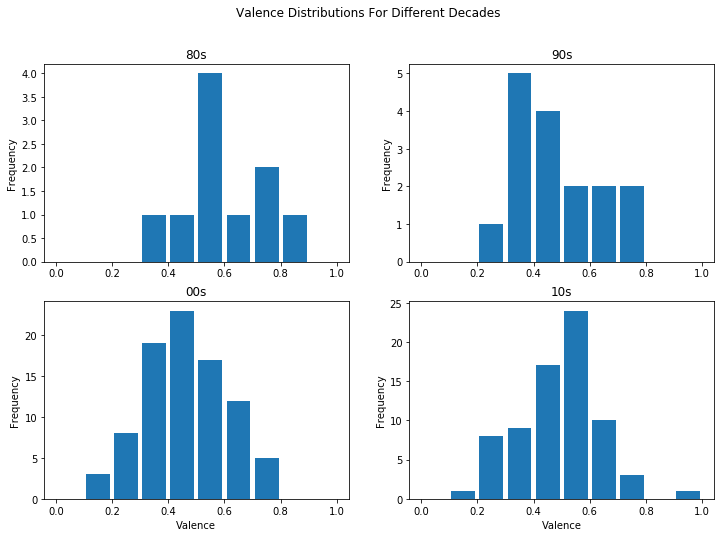

In [78]:
fig_2, axs_2 = plt.subplots(2,2,figsize=(12,8))
fig_2.suptitle('Valence Distributions For Different Decades')
axs_2[0,0].hist(valence_80, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_2[0,0].set(title="80s",ylabel="Frequency")
axs_2[0,1].hist(valence_90, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_2[0,1].set(title="90s",ylabel="Frequency")
axs_2[1,0].hist(valence_00, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_2[1,0].set(title="00s",ylabel="Frequency",xlabel="Valence")
axs_2[1,1].hist(valence_10, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_2[1,1].set(title="10s",ylabel="Frequency",xlabel="Valence")

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Danceability'),
 Text(0.5, 1.0, '10s')]

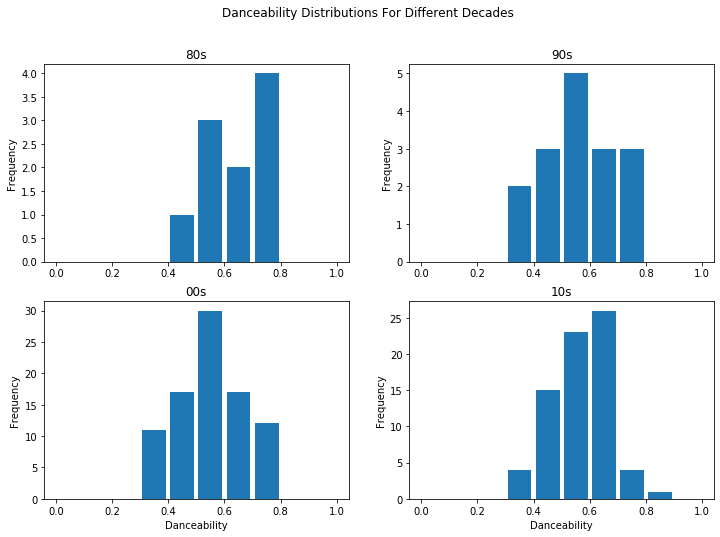

In [79]:
fig_3, axs_3 = plt.subplots(2,2,figsize=(12,8))
fig_3.suptitle('Danceability Distributions For Different Decades')
axs_3[0,0].hist(danceability_80, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_3[0,0].set(title="80s",ylabel="Frequency")
axs_3[0,1].hist(danceability_90, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_3[0,1].set(title="90s",ylabel="Frequency")
axs_3[1,0].hist(danceability_00, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_3[1,0].set(title="00s",ylabel="Frequency",xlabel="Danceability")
axs_3[1,1].hist(danceability_10, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_3[1,1].set(title="10s",ylabel="Frequency",xlabel="Danceability")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Energy'), Text(0.5, 1.0, '10s')]

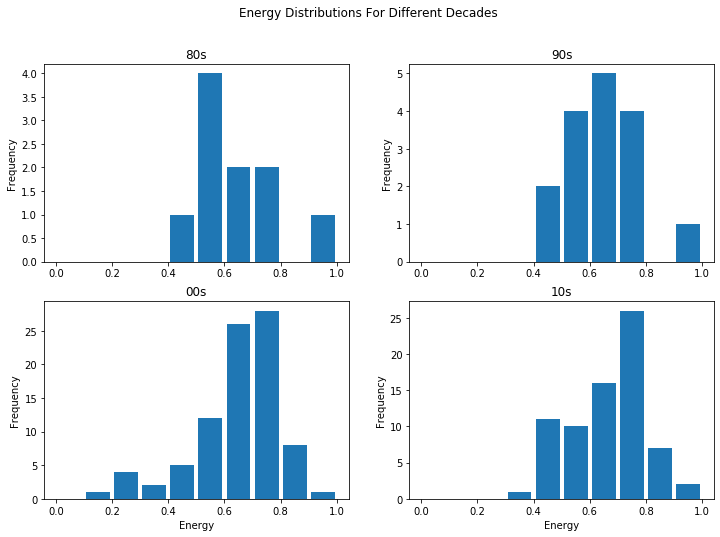

In [81]:
fig_4, axs_4 = plt.subplots(2,2,figsize=(12,8))
fig_4.suptitle('Energy Distributions For Different Decades')
axs_4[0,0].hist(energy_80, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_4[0,0].set(title="80s",ylabel="Frequency")
axs_4[0,1].hist(energy_90, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_4[0,1].set(title="90s",ylabel="Frequency")
axs_4[1,0].hist(energy_00, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_4[1,0].set(title="00s",ylabel="Frequency",xlabel="Energy")
axs_4[1,1].hist(energy_10, bins=10,rwidth=0.85,range=(0,1),align="mid")
axs_4[1,1].set(title="10s",ylabel="Frequency",xlabel="Energy")


From the results you can see that the 80s has the highest valence and danceability. Both these attributes decrease into the 90s but then continually increase to present day. This is not the most suprising result. The 80s, in my opinion, is known as quite a "danceable" decade with the emergence of genres like new wave and house, as well as disco music continuing in from the 70s. While these music genres are unlikely to be in the top 10 albums, they may feed into the general culture of pop music at the time, making it "more danceable". If you look at what the top 10 albums were, they include R&B albums by artists such as Michael Jackson and Whitney Houston as well as pop albums by Kylie Minogue and Madonna, so it's understandable why the danceability and valence of the decade is so high. This may be biased by only having the top 10 albums for the 80s and so comparing it to the top 50 or so of other decades may be unfair, if it is possible to get a dataset of the top 50/100 albums of the 80s this would improve the analysis.

As you move into the 90s, alternative rock and genres like grunge start to become more popular and reach the charts. Albums by artists such as Oasis, The Verve and R.E.M. are in the best-selling albums which are clearly less danceable and "happy" than some of the albums in the 80s. Which may explain the drop in these attributes. Over the next two decades, I think it's fair to say that the popularity of alternative rock or even rock in general waned in terms of the charts. It stays relatively popular in the 2000s, with artists like Red Hot Chili Peppers, Kings of Leon, Gorrilaz, Arctic Monkeys and many more still making it in the charts. However, in the 2010s pop music has really taken over the charts, with the top 10 all being pop artists and artist like Ed Sheeran and Adele appearing three times each in the top 10. Artists like Arctic Monkeys and Kings of Leon still appear but in general rock artists are few and far between. As pop music is generally happier and danceable than rock music, it explains why these two attributes have been increasing over the decades.

I feel this change in the genre of the "big" artists is quite evident outside of the charts too. While pop music will always have huge artists no matter the decade, rock/alternative used to have those huge artists regularly too. Nowadays it feels like there aren't really any massive rock acts emerging, like a Guns'N'Roses or a Foo Fighters. This is reflected in music festivals like Reading festival or Glastonbury where the headline acts are often older artists and have headlined the festival before, if they are rock acts. Nowadays the biggest acts tend to come from pop or from hip-hop. For example, take Glastonburys headliners this year. Kendrick Lamar is hip-hop, Taylor Swift is pop and Paul McCartney is an artist that first emerged back in the 60s. Look at Reading festival's headliners in 2020. Liam Gallagher and Rage Against the Machine are alternative rock acts but they both emerged in the 90s and Stormzy is grime/British hip-hop. This isn't necessarily a bad thing as tons of great music is still being produced as always, it is just an observation of what typically makes a big artist nowadays. In alternative/indie music I still feel there are quite a lot of big acts, they just aren't selling out stadiums or breaking into the charts like they used to occasionally. Artists like Tampe Impala have been hugely successful, but even they have moved away from psychedelic rock to a more pop and disco sound that brought about their most successful album.

When it comes to the energy attribute, the trend is a bit different. The average energy of the best-selling albums has consistently increased over the decades. I have no clear explanation as to why higher energy music may be becoming more popular but from this analysis it seems the best chance at making a best selling album currently is to create a high energy pop album that's happy and danceable, which is what I expected at the start. Obviously music is nowhere near this simple and can't be boiled down to simple characteristics such as danceability and valence. An album could be absolute rubbish but have a valence and danceability of 1.0, this wouldn't make it a successful album in the charts. Equally an album can be brilliant but be a lot less happy and danceable than most. Some of my favourite albums are like this, e.g. Slint - Spiderland has a valence of 0.16 and a danceability of 0.40 and Leonard Cohen - Songs Of Leonard Cohen has a valence of 0.33 and a danceability of 0.44. Ulimately, what I think this project has ended up tracking is the mainstream popularity of different genres, with a growth in alternative rock in the 90s and then pop music fully taking over in the 2010s. An interesting observation is how the average energy is increasing over the decades. Since pop music is dominant in all the decades and especially in the 2010s, the increase in energy can potentially be describing that pop music has generally become more energetic over time.

While the data has supported my thoughts that the best selling albums will generally be happier and more danceable, there is still a lot of variance in these values, as can be seen in the histograms. I believe this to be because of albums as a format, where the quality of the whole body of work is still very important and even if it's a bit less happy or less danceable, the quality will generally shine through to make it a best-selling album. Also, within an album there may be a mix of happy and sad songs that will affect the average of the album. My initial thoughts may be more suitable to best-selling singles of each decade. Generally, in my opinion, singles rely much more on catchiness than albums to achieve mass appeal and usually the most catchy songs are upbeat, dancy songs. So, if I did the same analysis on best-selling singles of each decade, I believe I would see this reflected in the data. I will carry out this analysis in a future project.